<a href="https://colab.research.google.com/github/Shivanidea/My-projects/blob/main/add_two_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Python/

/content/gdrive/MyDrive/Python


In [ ]:
%ls

'add two images.ipynb'   colour.jpg       gray5.jpg    lenac.png   si.JPG
 balloons_noisy.png      early_1800.jpg   image1.png   lena.jpg    test.png
 cameraman.jpg           fi.JPG           img1.png     moon1.png   Untitled
 cl2.jpg                 gray4.jpg        lenac.jpg    moon.jpg


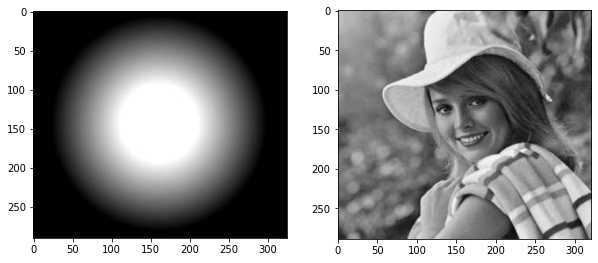

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread("moon1.png", 0)

img2 = cv2.imread("img1.png", 0)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(img1, "gray")
plt.subplot(1, 2, 2)
plt.imshow(img2, "gray")

In [ ]:
print(img1.shape)
print(img2.shape)

(290, 325)
(289, 321)


In [ ]:
img1 = cv2.resize(img1, (200,200), interpolation=cv2.INTER_AREA)
img2 = cv2.resize(img2, (200,200), interpolation=cv2.INTER_AREA)

In [ ]:
print(img1.shape)
print(img2.shape)

(200, 200)
(200, 200)


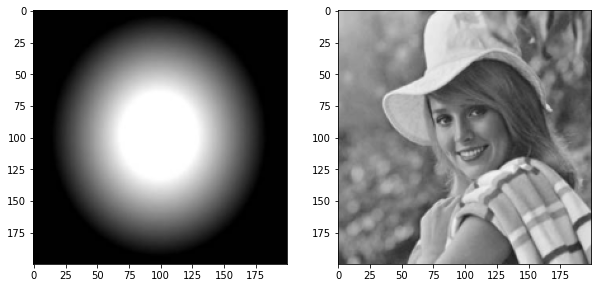

In [ ]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.subplot(1, 2, 2)
plt.imshow(img2)

In [ ]:
def Decimal2Ternary(pxl):
    
    """ Input : Decimal Value ; Output : Ternary string """

    """if pxl > 242:
        pxl = 242"""
    
    tern = np.zeros(6, dtype="int")
    value = [3**(5 - i) for i in range(6)]

    for i in range(6):

        if pxl >= value[i]:
            tern[i] = pxl // value[i]
            pxl = pxl % value[i]

    tern = tern.astype("str")
    tern = "".join(tern)
    
    return tern


In [ ]:
def TernAdd(pxl1, pxl2):
    
    """ Input : Two ternary strings ; Output : Ternary sum string """
    
    index = len(pxl1) - 1
    y = np.zeros(len(pxl1), dtype="int")
    q = 0

    while(index >= 0):
        
        sum = int(pxl1[index]) + int(pxl2[index]) + q
        
        if sum > 2:
            y[index] = sum - 3
            q = 1
        
        else:
            y[index] = sum
            q = 0
        
        index = index - 1
    
    y = "".join([str(i) for i in y])
    
    return y


In [ ]:
def Ternary2Decimal(pxl):
    
    """ Input : Ternary string ; Output : Decimal Value """

    out = 0
    value = [3**(5 - i) for i in range(6)]
    
    for i in range(len(value)):
        out = out + (int(pxl[i]) * value[i])
    
    return out


In [ ]:
sum_img = np.zeros(img1.shape)

for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        for k in range(img1.shape[2]):
            pxl_1 = Decimal2Ternary(img1[i, j, k])
            pxl_2 = Decimal2Ternary(img2[i, j, k])
            sum_pxl = TernAdd(pxl_1, pxl_2)
            sum_img[i, j, k] = Ternary2Decimal(sum_pxl)


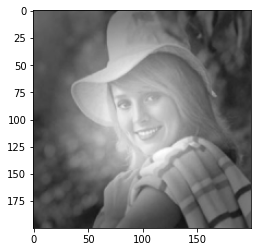

In [ ]:
sum_img = (sum_img*255)/np.max(sum_img)
sum_img = np.ceil(sum_img).astype("int")
plt.imshow(sum_img)